# Overfitting vs Underfitting
you can use cross-validation to get an estimate of a model’s generalization
performance. 
- If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. 

- If it per‐forms poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.

### Underfitting:
- If your model is **underfitting** the training data, **adding more train‐
ing examples will not help**. 

- You need to use a more **complex model**
or come up with **better features**.



### Overfitting:
- If **overfitting** model: **feed it more training data**
until the validation error reaches the training error.
- or **regulerization**

#  Polynomial Regression

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
# polynomial data 2nd order equation data
n = 100 # samples
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

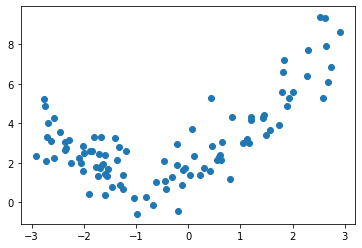

In [7]:
plt.scatter(X, y)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
# Adds to each x feature the 2nd order feature and the bias (new feature = [x, x^2, bias])
polynomial_features_transformer = PolynomialFeatures(degree=2, include_bias=True)

In [9]:
X_poly_features = polynomial_features_transformer.fit_transform(X)

In [13]:
X_poly_features[:5]

array([[ 1.        , -2.33712587,  5.46215732],
       [ 1.        , -0.45559182,  0.20756391],
       [ 1.        , -1.24090145,  1.53983642],
       [ 1.        ,  1.79643437,  3.22717643],
       [ 1.        , -1.53194829,  2.34686557]])

In [14]:
# Pass the polynomial features to linear regression = polynomial regression
regression = LinearRegression()

In [15]:
regression.fit(X=X_poly_features, y=y)

LinearRegression()

In [18]:
train_predictions = regression.predict(X_poly_features)

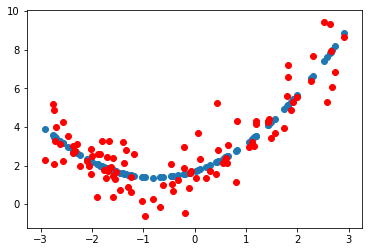

In [30]:
plt.scatter(X, train_predictions)
plt.scatter(X, y, color="red")

In [23]:
regression.intercept_, regression.coef_
# 2nd equation = 0.55 x^2 + 0.86 x + 1.72
# the true equation before noise was 0.5 x^2 + x + 2

(array([1.72427752]), array([[0.        , 0.86333112, 0.55553852]]))

# Regularization

Note that the regularization term should only be added
to the cost function during training Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.
It is quite common for the cost function used during training to be
different from the performance measure used for testing. Apart
from regularization, another reason why they might be different is
that a good training cost function should have optimizationfriendly derivatives, while the performance measure used for test‐ing should be as close as possible to the final objective. A good
example of this is a classifier trained using a cost function such as
the log loss but evaluated using precision/
recall

# Logistic Regression

In [1]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [2]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = dataset['data']
y = dataset['target']

In [12]:
X.shape, y.shape, X[0]

((150, 4), (150,), array([5.1, 3.5, 1.4, 0.2]))

In [13]:
from sklearn.linear_model import LogisticRegression

- it uses logistic regression that outputs a propability of each class in range[0-1]
- then apply softmax function to map all the probabilities to sum to 1

In [32]:
# Options of multilcass ['multinomial':you classify from many classes, 'ovr': binary classification]
softmax_logistic_regression = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, max_iter=1000)

In [33]:
softmax_logistic_regression.fit(X, y)

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial')

In [43]:
props = softmax_logistic_regression.predict_proba(X[0].reshape(1,-1))

In [44]:
props

array([[9.97170183e-01, 2.82981711e-03, 3.81078214e-15]])

In [45]:
import numpy as np
prediction = np.argmax(props)

In [46]:
prediction

0